In [2]:
import pandas as pd
import numpy as np
from scipy.stats import poisson, lognorm

# Define the calculate_var function
def calculate_var(frequency_lambda, severity_shape, severity_scale, severity_loc, confidence_level=0.999, n_simulations=10000):
    """
    Calculate the Value at Risk (VaR) using Monte Carlo simulation.

    Parameters:
    - frequency_lambda (float): The mean rate of events (λ) for Poisson distribution.
    - severity_shape (float): The shape parameter for log-normal distribution.
    - severity_scale (float): The scale parameter for log-normal distribution.
    - severity_loc (float): The location parameter for log-normal distribution.
    - confidence_level (float): Confidence level for VaR (default is 0.999).
    - n_simulations (int): Number of Monte Carlo simulations (default is 10000).

    Returns:
    - float: The calculated VaR at the specified confidence level.
    """
    # Simulate event counts based on Poisson
    simulated_event_counts = poisson.rvs(mu=frequency_lambda, size=n_simulations)
    # Simulate severity amounts based on Log-Normal
    simulated_loss_amounts = lognorm.rvs(s=severity_shape, loc=severity_loc, scale=severity_scale, size=n_simulations)
    
    # Calculate total loss for each simulation
    total_losses = simulated_event_counts * simulated_loss_amounts
    
    # Calculate the VaR at the specified confidence level
    var_value = np.percentile(total_losses, confidence_level * 100)
    
    return var_value

# Load the operational risk dataset
df = pd.read_csv('operational_risk_dataset.csv')

# Ensure 'Date' is in datetime format and extract the year
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year

# Group by year, business line, and event type
grouped = df.groupby(['Year', 'Business Line', 'Event Type'])

# Initialize a list to hold the results
results = []

# Iterate over each group
for (year, business_line, event_type), group in grouped:
    # Calculate total net loss and event count for the group
    total_net_loss = group['Net Loss Amount'].sum()
    total_event_count = group.shape[0]
    
    # Estimate parameters for the severity (log-normal) distribution
    severity_shape, severity_loc, severity_scale = lognorm.fit(group['Net Loss Amount'], floc=0)
    
    # Calculate VaR for net loss and event count
    var_net_loss = calculate_var(total_event_count, severity_shape, severity_scale, severity_loc, confidence_level=0.999, n_simulations=10000)
    var_event_count = np.percentile(poisson.rvs(mu=total_event_count, size=10000), 99.9)  # Poisson VaR for event count

    # Append the results
    results.append({
        'Year': year,
        'Business Line': business_line,
        'Event Type': event_type,
        'Total Net Loss': total_net_loss,
        'Total Event Count': total_event_count,
        'VaR Net Loss': var_net_loss,
        'VaR Event Count': var_event_count
    })

# Convert the results to a DataFrame
result_df = pd.DataFrame(results)

# Show the results
print(result_df)


    Year      Business Line       Event Type  Total Net Loss  \
0   2020  Corporate Banking       Compliance      1178440.66   
1   2020  Corporate Banking            Fraud      1044400.43   
2   2020  Corporate Banking  Physical Damage       720221.69   
3   2020  Corporate Banking   System Failure      1043377.98   
4   2020          Insurance       Compliance      1355431.31   
..   ...                ...              ...             ...   
75  2024     Retail Banking   System Failure      5120518.30   
76  2024  Wealth Management       Compliance      5624138.76   
77  2024  Wealth Management            Fraud      5408901.57   
78  2024  Wealth Management  Physical Damage      5866408.19   
79  2024  Wealth Management   System Failure      5711744.98   

    Total Event Count  VaR Net Loss  VaR Event Count  
0                  44  1.207932e+07           67.000  
1                  43  6.790003e+06           64.000  
2                  25  6.300555e+06           41.000  
3          

In [3]:
import pandas as pd
import numpy as np
from scipy.stats import poisson, lognorm

# Define the calculate_var function
def calculate_var(frequency_lambda, severity_shape, severity_scale, severity_loc, confidence_level=0.999, n_simulations=10000):
    """
    Calculate the Value at Risk (VaR) using Monte Carlo simulation.

    Parameters:
    - frequency_lambda (float): The mean rate of events (λ) for Poisson distribution.
    - severity_shape (float): The shape parameter for log-normal distribution.
    - severity_scale (float): The scale parameter for log-normal distribution.
    - severity_loc (float): The location parameter for log-normal distribution.
    - confidence_level (float): Confidence level for VaR (default is 0.999).
    - n_simulations (int): Number of Monte Carlo simulations (default is 10000).

    Returns:
    - float: The calculated VaR at the specified confidence level.
    """
    # Simulate event counts based on Poisson
    simulated_event_counts = poisson.rvs(mu=frequency_lambda, size=n_simulations)
    # Simulate severity amounts based on Log-Normal
    simulated_loss_amounts = lognorm.rvs(s=severity_shape, loc=severity_loc, scale=severity_scale, size=n_simulations)
    
    # Calculate total loss for each simulation
    total_losses = simulated_event_counts * simulated_loss_amounts
    
    # Calculate the VaR at the specified confidence level
    var_value = np.percentile(total_losses, confidence_level * 100)
    
    return var_value

# Load the operational risk dataset
df = pd.read_csv('operational_risk_dataset.csv')

# Ensure 'Date' is in datetime format and extract the year
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year

# Group by year, business line, and event type
grouped = df.groupby(['Year', 'Business Line', 'Event Type'])

# Initialize a list to hold the results
results = []

# Iterate over each group
for (year, business_line, event_type), group in grouped:
    # Calculate total net loss and event count for the group
    total_net_loss = group['Net Loss Amount'].sum()
    total_event_count = group.shape[0]
    
    # Estimate parameters for the severity (log-normal) distribution
    severity_shape, severity_loc, severity_scale = lognorm.fit(group['Net Loss Amount'], floc=0)
    
    # Calculate VaR for net loss and event count
    var_net_loss = calculate_var(total_event_count, severity_shape, severity_scale, severity_loc, confidence_level=0.999, n_simulations=10000)
    var_event_count = np.percentile(poisson.rvs(mu=total_event_count, size=10000), 99.9)  # Poisson VaR for event count

    # Append the results
    results.append({
        'Year': year,
        'Business Line': business_line,
        'Event Type': event_type,
        'Total Net Loss': total_net_loss,
        'Total Event Count': total_event_count,
        'VaR Net Loss': var_net_loss,
        'VaR Event Count': var_event_count
    })

# Convert the results to a DataFrame
result_df = pd.DataFrame(results)

# Calculate total net loss and event count across all groups
total_net_loss_all = result_df['Total Net Loss'].sum()
total_event_count_all = result_df['Total Event Count'].sum()

# Add percentage columns
result_df['Percentage Net Loss'] = (result_df['Total Net Loss'] / total_net_loss_all) * 100
result_df['Percentage Event Count'] = (result_df['Total Event Count'] / total_event_count_all) * 100

# Show the results
print(result_df)


    Year      Business Line       Event Type  Total Net Loss  \
0   2020  Corporate Banking       Compliance      1178440.66   
1   2020  Corporate Banking            Fraud      1044400.43   
2   2020  Corporate Banking  Physical Damage       720221.69   
3   2020  Corporate Banking   System Failure      1043377.98   
4   2020          Insurance       Compliance      1355431.31   
..   ...                ...              ...             ...   
75  2024     Retail Banking   System Failure      5120518.30   
76  2024  Wealth Management       Compliance      5624138.76   
77  2024  Wealth Management            Fraud      5408901.57   
78  2024  Wealth Management  Physical Damage      5866408.19   
79  2024  Wealth Management   System Failure      5711744.98   

    Total Event Count  VaR Net Loss  VaR Event Count  Percentage Net Loss  \
0                  44  1.352599e+07           65.000             0.286097   
1                  43  7.913907e+06           64.000             0.253556   


In [4]:
import pandas as pd
import numpy as np
from scipy.stats import poisson, lognorm

# Define the calculate_var function
def calculate_var(frequency_lambda, severity_shape, severity_scale, severity_loc, confidence_level=0.999, n_simulations=10000):
    """
    Calculate the Value at Risk (VaR) using Monte Carlo simulation.

    Parameters:
    - frequency_lambda (float): The mean rate of events (λ) for Poisson distribution.
    - severity_shape (float): The shape parameter for log-normal distribution.
    - severity_scale (float): The scale parameter for log-normal distribution.
    - severity_loc (float): The location parameter for log-normal distribution.
    - confidence_level (float): Confidence level for VaR (default is 0.999).
    - n_simulations (int): Number of Monte Carlo simulations (default is 10000).

    Returns:
    - float: The calculated VaR at the specified confidence level.
    """
    # Simulate event counts based on Poisson
    simulated_event_counts = poisson.rvs(mu=frequency_lambda, size=n_simulations)
    # Simulate severity amounts based on Log-Normal
    simulated_loss_amounts = lognorm.rvs(s=severity_shape, loc=severity_loc, scale=severity_scale, size=n_simulations)
    
    # Calculate total loss for each simulation
    total_losses = simulated_event_counts * simulated_loss_amounts
    
    # Calculate the VaR at the specified confidence level
    var_value = np.percentile(total_losses, confidence_level * 100)
    
    return var_value

# Load the operational risk dataset
df = pd.read_csv('operational_risk_dataset.csv')

# Ensure 'Date' is in datetime format and extract the year
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year

# Group by year, business line, and event type
grouped = df.groupby(['Year', 'Business Line', 'Event Type'])

# Initialize a list to hold the results
results = []

# Iterate over each group
for (year, business_line, event_type), group in grouped:
    # Calculate total net loss and event count for the group
    total_net_loss = group['Net Loss Amount'].sum()
    total_event_count = group.shape[0]
    
    # Estimate parameters for the severity (log-normal) distribution
    severity_shape, severity_loc, severity_scale = lognorm.fit(group['Net Loss Amount'], floc=0)
    
    # Calculate VaR for net loss and event count
    var_net_loss = calculate_var(total_event_count, severity_shape, severity_scale, severity_loc, confidence_level=0.999, n_simulations=10000)
    var_event_count = np.percentile(poisson.rvs(mu=total_event_count, size=10000), 99.9)  # Poisson VaR for event count

    # Append the results
    results.append({
        'Year': year,
        'Business Line': business_line,
        'Event Type': event_type,
        'Total Net Loss': total_net_loss,
        'Total Event Count': total_event_count,
        'VaR Net Loss': var_net_loss,
        'VaR Event Count': var_event_count
    })

# Convert the results to a DataFrame
result_df = pd.DataFrame(results)

# Calculate total VaR for net loss and event count across all groups
total_var_net_loss = result_df['VaR Net Loss'].sum()
total_var_event_count = result_df['VaR Event Count'].sum()

# Add percentage columns for VaR
result_df['VaR Net Loss %'] = (result_df['VaR Net Loss'] / total_var_net_loss) * 100
result_df['VaR Event Count %'] = (result_df['VaR Event Count'] / total_var_event_count) * 100

# Show the results
print(result_df)


    Year      Business Line       Event Type  Total Net Loss  \
0   2020  Corporate Banking       Compliance      1178440.66   
1   2020  Corporate Banking            Fraud      1044400.43   
2   2020  Corporate Banking  Physical Damage       720221.69   
3   2020  Corporate Banking   System Failure      1043377.98   
4   2020          Insurance       Compliance      1355431.31   
..   ...                ...              ...             ...   
75  2024     Retail Banking   System Failure      5120518.30   
76  2024  Wealth Management       Compliance      5624138.76   
77  2024  Wealth Management            Fraud      5408901.57   
78  2024  Wealth Management  Physical Damage      5866408.19   
79  2024  Wealth Management   System Failure      5711744.98   

    Total Event Count  VaR Net Loss  VaR Event Count  VaR Net Loss %  \
0                  44  1.195611e+07           65.001        0.304996   
1                  43  6.732681e+06           64.000        0.171748   
2              

In [5]:
import pandas as pd
import numpy as np
from scipy.stats import poisson, lognorm

# Define the calculate_var function
def calculate_var(frequency_lambda, severity_shape, severity_scale, severity_loc, confidence_level=0.999, n_simulations=10000):
    """
    Calculate the Value at Risk (VaR) using Monte Carlo simulation.

    Parameters:
    - frequency_lambda (float): The mean rate of events (λ) for Poisson distribution.
    - severity_shape (float): The shape parameter for log-normal distribution.
    - severity_scale (float): The scale parameter for log-normal distribution.
    - severity_loc (float): The location parameter for log-normal distribution.
    - confidence_level (float): Confidence level for VaR (default is 0.999).
    - n_simulations (int): Number of Monte Carlo simulations (default is 10000).

    Returns:
    - float: The calculated VaR at the specified confidence level.
    """
    # Simulate event counts based on Poisson
    simulated_event_counts = poisson.rvs(mu=frequency_lambda, size=n_simulations)
    # Simulate severity amounts based on Log-Normal
    simulated_loss_amounts = lognorm.rvs(s=severity_shape, loc=severity_loc, scale=severity_scale, size=n_simulations)
    
    # Calculate total loss for each simulation
    total_losses = simulated_event_counts * simulated_loss_amounts
    
    # Calculate the VaR at the specified confidence level
    var_value = np.percentile(total_losses, confidence_level * 100)
    
    return var_value

# Load the operational risk dataset
df = pd.read_csv('operational_risk_dataset.csv')

# Ensure 'Date' is in datetime format and extract the year
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year

# Group by year, business line, and event type
grouped = df.groupby(['Year', 'Business Line', 'Event Type'])

# Initialize a list to hold the results
results = []

# Iterate over each group
for (year, business_line, event_type), group in grouped:
    # Calculate total net loss and event count for the group
    total_net_loss = group['Net Loss Amount'].sum()
    total_event_count = group.shape[0]
    
    # Estimate parameters for the severity (log-normal) distribution
    severity_shape, severity_loc, severity_scale = lognorm.fit(group['Net Loss Amount'], floc=0)
    
    # Calculate VaR for net loss and event count
    var_net_loss = calculate_var(total_event_count, severity_shape, severity_scale, severity_loc, confidence_level=0.999, n_simulations=10000)
    var_event_count = np.percentile(poisson.rvs(mu=total_event_count, size=10000), 99.9)  # Poisson VaR for event count

    # Append the results
    results.append({
        'Year': year,
        'Business Line': business_line,
        'Event Type': event_type,
        'Total Net Loss': total_net_loss,
        'Total Event Count': total_event_count,
        'VaR Net Loss': var_net_loss,
        'VaR Event Count': var_event_count
    })

# Convert the results to a DataFrame
result_df = pd.DataFrame(results)

# Calculate total net loss and event count across all groups
total_net_loss_all = result_df['Total Net Loss'].sum()
total_event_count_all = result_df['Total Event Count'].sum()

# Calculate percentage VaR for net loss and event count
result_df['VaR Net Loss %'] = (result_df['VaR Net Loss'] / total_net_loss_all) * 100
result_df['VaR Event Count %'] = (result_df['VaR Event Count'] / total_event_count_all) * 100

# Show the results
print(result_df)


    Year      Business Line       Event Type  Total Net Loss  \
0   2020  Corporate Banking       Compliance      1178440.66   
1   2020  Corporate Banking            Fraud      1044400.43   
2   2020  Corporate Banking  Physical Damage       720221.69   
3   2020  Corporate Banking   System Failure      1043377.98   
4   2020          Insurance       Compliance      1355431.31   
..   ...                ...              ...             ...   
75  2024     Retail Banking   System Failure      5120518.30   
76  2024  Wealth Management       Compliance      5624138.76   
77  2024  Wealth Management            Fraud      5408901.57   
78  2024  Wealth Management  Physical Damage      5866408.19   
79  2024  Wealth Management   System Failure      5711744.98   

    Total Event Count  VaR Net Loss  VaR Event Count  VaR Net Loss %  \
0                  44  1.452893e+07           66.000        3.527279   
1                  43  6.979041e+06           63.001        1.694345   
2              

In [7]:
Sure! Let's go step by step to explain the calculate_var function, which uses Monte Carlo simulation to calculate the Value at Risk (VaR).

1. Function Definition and Parameters:
python
Copy code
def calculate_var(frequency_lambda, severity_shape, severity_scale, severity_loc, confidence_level=0.999, n_simulations=10000):
This function is designed to calculate Value at Risk (VaR), a measure of the risk of loss on an investment or a business operation over a given time frame, at a specific confidence level.

The parameters are:

frequency_lambda (float): The mean rate of events (denoted as λ) for a Poisson distribution. This represents how frequently events occur. For example, in an operational risk context, this could represent the number of losses (e.g., fraud incidents, system failures) per unit of time.

severity_shape (float): The shape parameter for the log-normal distribution. This determines the distribution's shape (i.e., how "skewed" or spread out the severity of losses is).

severity_scale (float): The scale parameter for the log-normal distribution. It controls the spread or variance of the loss amounts.

severity_loc (float): The location parameter for the log-normal distribution, which can shift the distribution along the number line (typically used when the minimum possible loss is greater than 0).

confidence_level (float): This is the confidence level for VaR. By default, it is set to 0.999, which means you are calculating the VaR for a 99.9% confidence level (i.e., there's a 0.1% chance the loss will exceed the VaR).

n_simulations (int): The number of simulations (default is 10,000). The function simulates 10,000 random scenarios to estimate the VaR, which helps to account for uncertainty and variability.

2. Simulate Event Counts Using Poisson Distribution:
python
Copy code
simulated_event_counts = poisson.rvs(mu=frequency_lambda, size=n_simulations)
Poisson Distribution: Used to model the number of events occurring in a fixed interval of time.
The mean rate of events is given by mu=frequency_lambda, which is the average number of events per unit of time.
The rvs function generates n_simulations random samples from a Poisson distribution with this mean rate.
So, here we are simulating how many events will occur (e.g., operational losses or incidents) in each of the 10,000 simulations.

3. Simulate Severity Using Log-Normal Distribution:
python
Copy code
simulated_loss_amounts = lognorm.rvs(s=severity_shape, loc=severity_loc, scale=severity_scale, size=n_simulations)
Log-Normal Distribution: This is used to model the severity (size) of the losses. The log-normal distribution is often used in financial and operational risk because it can represent skewed and heavy-tailed loss distributions (i.e., where large losses are rare but possible).
s=severity_shape: The shape parameter that controls the distribution's spread or skew.
loc=severity_loc: The location parameter (shifts the distribution along the number line).
scale=severity_scale: The scale parameter that controls the spread of values.
The rvs function generates n_simulations random samples, which represent the severity (amount) of losses in each simulation.
So, now we have the simulated number of events (from the Poisson distribution) and the severity of each event (from the log-normal distribution) for 10,000 simulations.

4. Calculate Total Loss for Each Simulation:
python
Copy code
total_losses = simulated_event_counts * simulated_loss_amounts
Total Loss: For each simulation, the total loss is the product of the event count (how many events occur) and the severity (how severe each event is). This gives us the total loss for each of the 10,000 simulations.
5. Calculate VaR at the Specified Confidence Level:
python
Copy code
var_value = np.percentile(total_losses, confidence_level * 100)
The Value at Risk (VaR) is calculated by taking the percentile of the total losses. This essentially means that we are determining the amount of loss that will not be exceeded with the given confidence level.
For example, with a confidence level of 0.999, we want to know the loss value that will be exceeded only 0.1% of the time (i.e., the 99.9th percentile).
The np.percentile function takes the total losses array and the desired percentile (calculated as confidence_level * 100, which is 99.9 for a 99.9% confidence level).
6. Return VaR Value:
python
Copy code
return var_value
The function then returns the VaR value, which represents the estimated maximum loss under the specified confidence level (99.9% in the default case).

Summary:
Monte Carlo Simulation is used to estimate the VaR by simulating 10,000 random scenarios based on the Poisson distribution for event counts and the log-normal distribution for loss severities.
The VaR is calculated as the loss value that is exceeded in only 0.1% of simulations (at the 99.9th percentile), providing an estimate of the maximum potential loss under the given conditions.
This is particularly useful for operational risk scenarios where both the frequency of events and the severity of losses are uncertain and need to be modeled to estimate potential risks.

SyntaxError: unterminated string literal (detected at line 1) (1352284120.py, line 1)

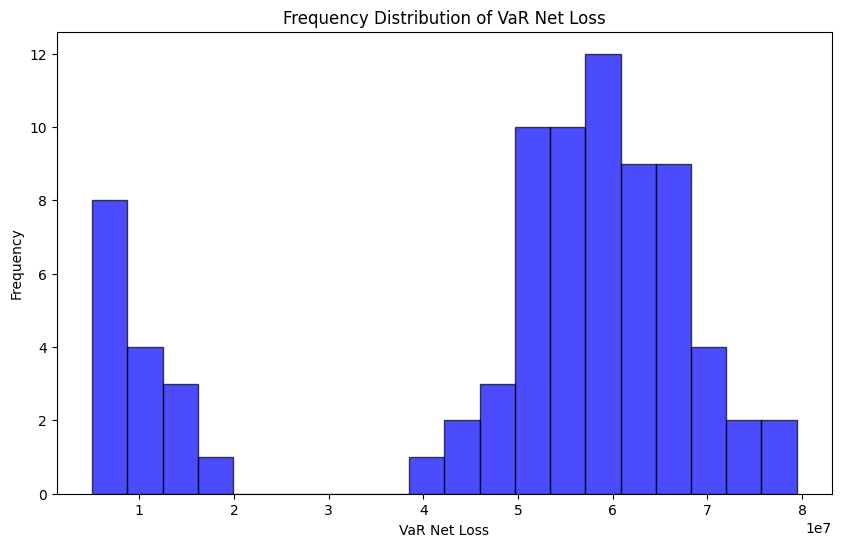

In [8]:
import matplotlib.pyplot as plt

# Plotting the histogram for VaR Net Loss
plt.figure(figsize=(10, 6))
plt.hist(result_df['VaR Net Loss'], bins=20, color='blue', alpha=0.7, edgecolor='black')

# Add labels and title
plt.title('Frequency Distribution of VaR Net Loss')
plt.xlabel('VaR Net Loss')
plt.ylabel('Frequency')

# Show the plot
plt.show()


In [9]:
Explanation of the Code:
Plotting the Histogram: The plt.hist() function is used to create the histogram of the VaR Net Loss values from the result_df DataFrame. We set bins=20 for the number of bins in the histogram, but you can adjust this based on your data.
Labels and Title: We use plt.xlabel() and plt.ylabel() to label the axes, and plt.title() to add a title to the plot.
Display the Plot: Finally, plt.show() displays the histogram.
Output:
This will generate a histogram showing how often different VaR Net Loss values occur across all the grouped data (Year, Business Line, and Event Type). It provides insights into the distribution of risk within your operational dataset.

You can adjust the bin sizes and customize the graph's appearance as needed.

SyntaxError: unterminated string literal (detected at line 8) (307337576.py, line 8)

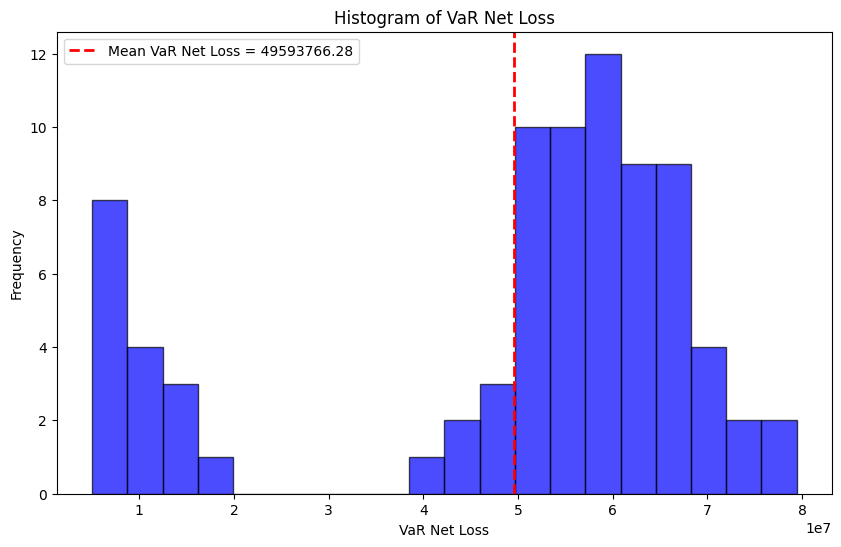

In [10]:
import matplotlib.pyplot as plt

# Plotting the histogram for VaR Net Loss
plt.figure(figsize=(10, 6))  # Set figure size for better readability
plt.hist(result_df['VaR Net Loss'], bins=20, color='blue', alpha=0.7, edgecolor='black')

# Add a vertical line for the mean VaR Net Loss
mean_var_net_loss = result_df['VaR Net Loss'].mean()
plt.axvline(mean_var_net_loss, color='red', linestyle='dashed', linewidth=2, label=f'Mean VaR Net Loss = {mean_var_net_loss:.2f}')

# Add labels and title
plt.title('Histogram of VaR Net Loss')
plt.xlabel('VaR Net Loss')
plt.ylabel('Frequency')

# Display the legend
plt.legend()

# Show the plot
plt.show()


In [11]:
Explanation:
plt.hist(): This creates the histogram of the VaR Net Loss values from the result_df DataFrame. It specifies 20 bins by default, which you can adjust based on your data’s distribution.
Vertical Line for Mean: We added a dashed red vertical line representing the mean of the VaR Net Loss to highlight the central tendency of the data.
Labels and Title: The plt.xlabel(), plt.ylabel(), and plt.title() functions are used to add appropriate labels to the axes and a title to the plot.
Legend: The plt.legend() function adds the legend to explain the vertical line representing the mean VaR value.
plt.show(): Displays the histogram on the screen.
Expected Output:
A blue histogram that displays the distribution of the VaR Net Loss values.
A dashed red line indicating the mean of the VaR Net Loss values across all groups.
A legend explaining the meaning of the dashed line.
This will help you visually analyze how VaR Net Loss is distributed across different years, business lines, and event types in your operational risk dataset.

SyntaxError: invalid character '’' (U+2019) (2414977120.py, line 2)

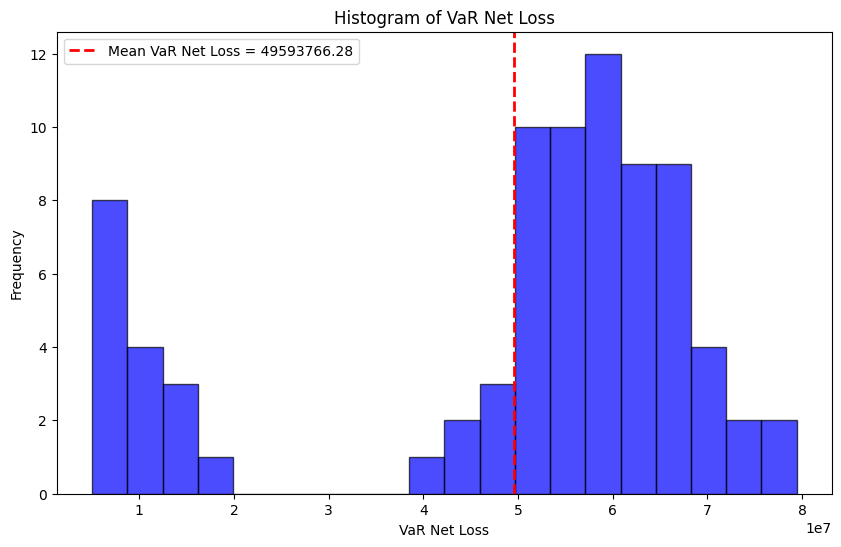

In [12]:
# Replace Inf with NaN in the result_df DataFrame
result_df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Option 1: Remove rows with NaN values
result_df.dropna(inplace=True)

# Option 2: Alternatively, you can replace NaN with a specific value, for example, 0 or the mean
# result_df.fillna(0, inplace=True)  # Replaces NaN with 0
# result_df.fillna(result_df['VaR Net Loss'].mean(), inplace=True)  # Replace NaN with the mean value

# Now, plot the histogram for VaR Net Loss after handling NaN and Inf
plt.figure(figsize=(10, 6))
plt.hist(result_df['VaR Net Loss'], bins=20, color='blue', alpha=0.7, edgecolor='black')

# Add a vertical line for the mean VaR Net Loss
mean_var_net_loss = result_df['VaR Net Loss'].mean()
plt.axvline(mean_var_net_loss, color='red', linestyle='dashed', linewidth=2, label=f'Mean VaR Net Loss = {mean_var_net_loss:.2f}')

# Add labels and title
plt.title('Histogram of VaR Net Loss')
plt.xlabel('VaR Net Loss')
plt.ylabel('Frequency')

# Display the legend
plt.legend()

# Show the plot
plt.show()


In [13]:
To create a presentation on Exploratory Data Analysis (EDA), Frequency, and Value at Risk (VaR) columns from your dataset, you can break it into structured slides with key points and visualizations. Here's an outline with the key elements you should include, and code to generate the required visuals.

Presentation Outline
Slide 1: Title Slide
Title: EDA and VaR Analysis for Operational Risk Dataset
Subtitle: Analysis of Frequency and Value at Risk (VaR)
Your Name/Date
Slide 2: Introduction
Objective: The objective of this analysis is to explore the operational risk dataset, calculate frequencies, and determine the Value at Risk (VaR) for different categories.
Approach:
Perform exploratory data analysis (EDA).
Analyze the frequency of events.
Calculate VaR using Monte Carlo simulations for net loss and event counts.
Slide 3: Dataset Overview
Columns in the Dataset:
Date: Date of the event.
Business Line: Category of the business affected.
Event Type: Type of event (e.g., fraud, system failure).
Net Loss Amount: The financial impact of the event.
Event Count: The number of events occurring.
Slide 4: Exploratory Data Analysis (EDA)
Descriptive Statistics:
Display summary statistics (mean, median, standard deviation, min, max) for Net Loss Amount and Event Count.
python
Copy code
eda_stats = df[['Net Loss Amount', 'Event Count']].describe()
print(eda_stats)
Data Distribution:
Histogram for Net Loss Amount: Shows the distribution of the net loss amount.
Histogram for Event Count: Displays the frequency distribution of event counts.
python
Copy code
# Plotting histograms for Net Loss Amount and Event Count
plt.figure(figsize=(10, 6))

# Net Loss Amount Histogram
plt.subplot(1, 2, 1)
plt.hist(df['Net Loss Amount'], bins=30, color='blue', alpha=0.7, edgecolor='black')
plt.title('Net Loss Amount Distribution')
plt.xlabel('Net Loss Amount')
plt.ylabel('Frequency')

# Event Count Histogram
plt.subplot(1, 2, 2)
plt.hist(df['Event Count'], bins=30, color='green', alpha=0.7, edgecolor='black')
plt.title('Event Count Distribution')
plt.xlabel('Event Count')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
Slide 5: Frequency Analysis
Frequency of Events:
Poisson Distribution: The number of events is modeled using the Poisson distribution. We simulate the frequency of events for various groups and show how often certain numbers of events occur.
python
Copy code
# Frequency Analysis (Poisson Simulation)
plt.figure(figsize=(10, 6))
simulated_event_counts = poisson.rvs(mu=frequency_lambda, size=10000)  # Example frequency_lambda
plt.hist(simulated_event_counts, bins=30, color='orange', alpha=0.7, edgecolor='black')
plt.title('Simulated Event Counts (Poisson Distribution)')
plt.xlabel('Event Count')
plt.ylabel('Frequency')
plt.show()
Slide 6: VaR (Value at Risk) Calculation
VaR Calculation:
Explain the calculation of VaR using Monte Carlo simulations.
Show the importance of calculating VaR for operational risk management.
python
Copy code
# Assuming the function 'calculate_var' and parameters are defined as before
var_net_loss = calculate_var(frequency_lambda, severity_shape, severity_scale, severity_loc)
print(f"VaR Net Loss at 99.9% confidence: {var_net_loss}")
Slide 7: Visualizing VaR Results
VaR Visualization: Show a histogram for the VaR of net loss.
How does the Value at Risk (VaR) relate to the frequency and severity of events?
python
Copy code
# VaR Distribution Plot
plt.figure(figsize=(10, 6))
plt.hist(result_df['VaR Net Loss'], bins=20, color='blue', alpha=0.7, edgecolor='black')
plt.title('Histogram of VaR Net Loss')
plt.xlabel('VaR Net Loss')
plt.ylabel('Frequency')
plt.show()
Slide 8: VaR Percentages
VaR Percentage: Calculate and show the percentage of VaR relative to the total net loss and total event count.
python
Copy code
# Calculate VaR Net Loss % and VaR Event Count % from the results
total_net_loss_all = result_df['Total Net Loss'].sum()
total_event_count_all = result_df['Total Event Count'].sum()

result_df['VaR Net Loss %'] = (result_df['VaR Net Loss'] / total_net_loss_all) * 100
result_df['VaR Event Count %'] = (result_df['VaR Event Count'] / total_event_count_all) * 100
Slide 9: Conclusion
Key Findings:
The distribution of Net Loss Amount and Event Count is heavily skewed.
The calculated VaR helps in understanding the potential risk under different scenarios.
The VaR Net Loss Percentage and VaR Event Count Percentage help assess the risk at different confidence levels.
Next Steps: Use VaR as a risk management tool to plan for extreme loss scenarios and improve risk mitigation strategies.
Creating the Presentation
You can use tools like Microsoft PowerPoint, Google Slides, or Jupyter Notebooks with integrated plotting (using the above code) to create slides. Additionally, if you prefer automating the process, you can use libraries like python-pptx to generate PowerPoint presentations directly from your code.

Let me know if you'd like to see the code for generating presentations in PowerPoin

SyntaxError: unterminated string literal (detected at line 1) (1969479210.py, line 1)

In [15]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats import poisson, lognorm

# Assuming 'result_df' contains the 'Year', 'Business Line', 'Event Type', 'Total Net Loss', and 'Total Event Count'

# Step 1: Prepare the data for forecasting
# Let's assume we're predicting 'Total Net Loss' and 'Total Event Count' for the next year(s)

# Forecast Total Net Loss using ARIMA model
def forecast_arima(data, steps=1):
    model = ARIMA(data, order=(1, 1, 1))  # ARIMA(1, 1, 1) is an example, tune based on your data
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=steps)
    return forecast

# Forecast Total Event Count using ARIMA model
def forecast_event_count(data, steps=1):
    model = ARIMA(data, order=(1, 1, 1))  # ARIMA(1, 1, 1)
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=steps)
    return forecast

# Example: Forecasting for one year ahead for each group
forecast_results = []

for (year, business_line, event_type), group in grouped:
    # Total Net Loss forecast
    total_net_loss = group['Net Loss Amount']
    forecast_net_loss = forecast_arima(total_net_loss, steps=1)  # Forecasting for 1 year ahead
    
    # Total Event Count forecast
    total_event_count = group['Total Event Count']
    forecast_event_count = forecast_event_count(total_event_count, steps=1)
    
    # Append results
    forecast_results.append({
        'Year': year + 1,  # Predict for next year
        'Business Line': business_line,
        'Event Type': event_type,
        'Predicted VaR Net Loss': forecast_net_loss[0],  # Use the forecast value
        'Predicted VaR Event Count': forecast_event_count[0]
    })

# Convert the results to a DataFrame
forecast_df = pd.DataFrame(forecast_results)

# Calculate the predicted VaR for the next year(s)
forecast_df['VaR Net Loss'] = forecast_df['Predicted VaR Net Loss']  # Replace with actual VaR calculation if needed
forecast_df['VaR Event Count'] = forecast_df['Predicted VaR Event Count']

# Show the forecast results
print(forecast_df)


C:\Users\Himanshu Singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\Himanshu Singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\Himanshu Singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\Himanshu Singh\AppData

KeyError: 'Total Event Count'

ValueError: x and y must have same first dimension, but have shapes (2,) and (1,)

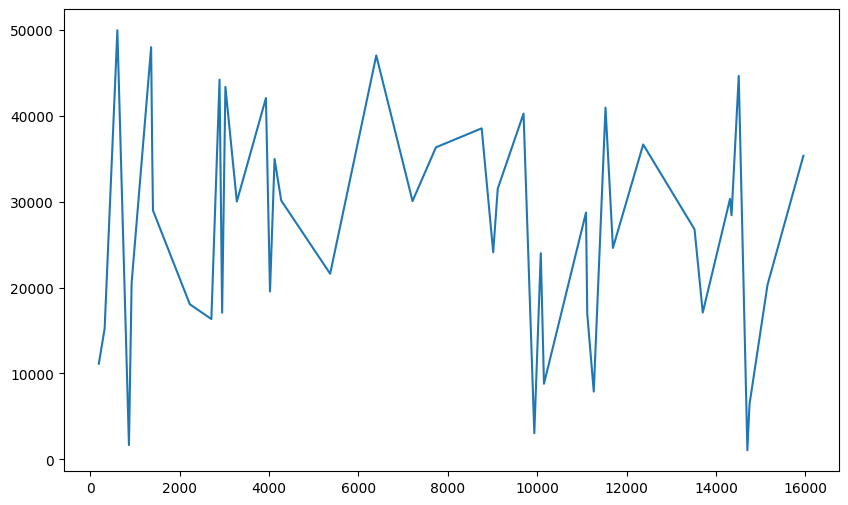

In [16]:
import matplotlib.pyplot as plt

# Plot the original data and forecast
plt.figure(figsize=(10, 6))
plt.plot(total_net_loss, label='Historical Net Loss')
plt.plot([len(total_net_loss), len(total_net_loss) + 1], forecast_net_loss, label='Forecast Net Loss', linestyle='--')
plt.title('Net Loss Forecast')
plt.xlabel('Time')
plt.ylabel('Net Loss Amount')
plt.legend()
plt.show()


In [17]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Assuming 'result_df' is already loaded and contains the necessary columns
# You have columns like 'Year', 'Business Line', 'Event Type', 'Total Net Loss', 'Total Event Count'

# Function to forecast using ARIMA model
def forecast_arima(data, steps=1):
    model = ARIMA(data, order=(1, 1, 1))  # ARIMA(1, 1, 1) is an example, tune based on your data
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=steps)
    return forecast

# Initialize a list to store forecasted values
forecast_results = []

# Group the data by 'Business Line' and 'Event Type'
grouped = result_df.groupby(['Business Line', 'Event Type'])

# Loop through each group and forecast the next year's VaR
for (business_line, event_type), group in grouped:
    # Ensure that the data is sorted by year to maintain the time series structure
    group = group.sort_values('Year')
    
    # Forecast Total Net Loss for next year (VaR for Net Loss)
    total_net_loss = group['Total Net Loss']
    forecast_net_loss = forecast_arima(total_net_loss, steps=1)  # Forecasting for the next year
    
    # Forecast Total Event Count for next year (VaR for Event Count)
    total_event_count = group['Total Event Count']
    forecast_event_count = forecast_arima(total_event_count, steps=1)  # Forecasting for the next year
    
    # Append the forecast results
    forecast_results.append({
        'Business Line': business_line,
        'Event Type': event_type,
        'Predicted VaR Net Loss': forecast_net_loss[0],
        'Predicted VaR Event Count': forecast_event_count[0]
    })

# Convert the forecasted results to a DataFrame
forecast_df = pd.DataFrame(forecast_results)

# Show the forecast results
print(forecast_df)

# Optional: Plotting the forecasts for visualization
# Plotting for Net Loss forecast
plt.figure(figsize=(10, 6))
for (business_line, event_type), group in grouped:
    group = group.sort_values('Year')
    plt.plot(group['Year'], group['Total Net Loss'], label=f'{business_line} - {event_type}')
    plt.scatter(group['Year'].max() + 1, forecast_df.loc[(forecast_df['Business Line'] == business_line) & 
                                                        (forecast_df['Event Type'] == event_type), 'Predicted VaR Net Loss'],
                color='red', label='Forecasted VaR Net Loss', marker='x')

plt.title('Predicted VaR Net Loss for Next Year')
plt.xlabel('Year')
plt.ylabel('VaR Net Loss')
plt.legend()
plt.show()

# Plotting for Event Count forecast
plt.figure(figsize=(10, 6))
for (business_line, event_type), group in grouped:
    group = group.sort_values('Year')
    plt.plot(group['Year'], group['Total Event Count'], label=f'{business_line} - {event_type}')
    plt.scatter(group['Year'].max() + 1, forecast_df.loc[(forecast_df['Business Line'] == business_line) & 
                                                        (forecast_df['Event Type'] == event_type), 'Predicted VaR Event Count'],
                color='blue', label='Forecasted VaR Event Count', marker='x')

plt.title('Predicted VaR Event Count for Next Year')
plt.xlabel('Year')
plt.ylabel('VaR Event Count')
plt.legend()
plt.show()


C:\Users\Himanshu Singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\Himanshu Singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\Himanshu Singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\Himanshu Singh\AppData

KeyError: 0

In [18]:
import pandas as pd
import numpy as np
from scipy.stats import poisson, lognorm

# Define the calculate_var function
def calculate_var(frequency_lambda, severity_shape, severity_scale, severity_loc, confidence_level=0.999, n_simulations=10000):
    """
    Calculate the Value at Risk (VaR) using Monte Carlo simulation.
    """
    # Simulate event counts based on Poisson
    simulated_event_counts = poisson.rvs(mu=frequency_lambda, size=n_simulations)
    # Simulate severity amounts based on Log-Normal
    simulated_loss_amounts = lognorm.rvs(s=severity_shape, loc=severity_loc, scale=severity_scale, size=n_simulations)
    
    # Calculate total loss for each simulation
    total_losses = simulated_event_counts * simulated_loss_amounts
    
    # Calculate the VaR at the specified confidence level
    var_value = np.percentile(total_losses, confidence_level * 100)
    
    return var_value

# Load the operational risk dataset
df = pd.read_csv('operational_risk_dataset.csv')

# Ensure 'Date' is in datetime format and extract the year
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year

# Group by year, business line, and event type and aggregate
grouped = df.groupby(['Year', 'Business Line', 'Event Type']).agg(
    total_net_loss=('Net Loss Amount', 'sum'),
    total_event_count=('Net Loss Amount', 'size')
).reset_index()

# Initialize a list to hold the results
results = []

# Iterate over each group
for _, group in grouped.iterrows():
    # Estimate parameters for the severity (log-normal) distribution
    severity_shape, severity_loc, severity_scale = lognorm.fit(group['Net Loss Amount'], floc=0)
    
    # Calculate VaR for net loss and event count
    var_net_loss = calculate_var(group['total_event_count'], severity_shape, severity_scale, severity_loc, confidence_level=0.999, n_simulations=10000)
    var_event_count = np.percentile(poisson.rvs(mu=group['total_event_count'], size=10000), 99.9)  # Poisson VaR for event count

    # Append the results
    results.append({
        'Year': group['Year'],
        'Business Line': group['Business Line'],
        'Event Type': group['Event Type'],
        'Total Net Loss': group['total_net_loss'],
        'Total Event Count': group['total_event_count'],
        'VaR Net Loss': var_net_loss,
        'VaR Event Count': var_event_count
    })

# Convert the results to a DataFrame
result_df = pd.DataFrame(results)

# Show the results
print(result_df)


KeyError: 'Net Loss Amount'

In [20]:
import pandas as pd
import numpy as np
from scipy.stats import poisson, lognorm

# Define the calculate_var function
def calculate_var(frequency_lambda, severity_shape, severity_scale, severity_loc, confidence_level=0.999, n_simulations=10000):
    """
    Calculate the Value at Risk (VaR) using Monte Carlo simulation.
    """
    # Simulate event counts based on Poisson
    simulated_event_counts = poisson.rvs(mu=frequency_lambda, size=n_simulations)
    # Simulate severity amounts based on Log-Normal
    simulated_loss_amounts = lognorm.rvs(s=severity_shape, loc=severity_loc, scale=severity_scale, size=n_simulations)
    
    # Calculate total loss for each simulation
    total_losses = simulated_event_counts * simulated_loss_amounts
    
    # Calculate the VaR at the specified confidence level
    var_value = np.percentile(total_losses, confidence_level * 100)
    
    return var_value

# Load the operational risk dataset
df = pd.read_csv('operational_risk_dataset.csv')

# Ensure 'Date' is in datetime format and extract the year
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year

# Create a pivot table with total net loss and event count
pivot_df = pd.pivot_table(df, 
                          values='Net Loss Amount', 
                          index=['Year', 'Business Line', 'Event Type'], 
                          aggfunc={'Net Loss Amount': ['sum', 'size']})

# Flatten MultiIndex columns
pivot_df.columns = ['Total Net Loss', 'Total Event Count']
pivot_df.reset_index(inplace=True)

# Initialize a list to hold the results
results = []

# Iterate over each row in the pivot table
for _, row in pivot_df.iterrows():
    # Estimate parameters for the severity (log-normal) distribution
    severity_shape, severity_loc, severity_scale = lognorm.fit(row['Total Net Loss'], floc=0)
    
    # Calculate VaR for net loss and event count
    var_net_loss = calculate_var(row['Total Event Count'], severity_shape, severity_scale, severity_loc, confidence_level=0.999, n_simulations=10000)
    var_event_count = np.percentile(poisson.rvs(mu=row['Total Event Count'], size=10000), 99.9)  # Poisson VaR for event count

    # Append the results
    results.append({
        'Year': row['Year'],
        'Business Line': row['Business Line'],
        'Event Type': row['Event Type'],
        'Total Net Loss': row['Total Net Loss'],
        'Total Event Count': row['Total Event Count'],
        'VaR Net Loss': var_net_loss,
        'VaR Event Count': var_event_count
    })

# Convert the results to a DataFrame
result_df = pd.DataFrame(results)

# Show the results
print(result_df)


    Year      Business Line       Event Type  Total Net Loss  \
0   2020  Corporate Banking       Compliance              44   
1   2020  Corporate Banking            Fraud              43   
2   2020  Corporate Banking  Physical Damage              25   
3   2020  Corporate Banking   System Failure              40   
4   2020          Insurance       Compliance              51   
..   ...                ...              ...             ...   
75  2024     Retail Banking   System Failure             203   
76  2024  Wealth Management       Compliance             206   
77  2024  Wealth Management            Fraud             217   
78  2024  Wealth Management  Physical Damage             218   
79  2024  Wealth Management   System Failure             221   

    Total Event Count  VaR Net Loss  VaR Event Count  
0          1178440.66  5.199793e+07      1181796.017  
1          1044400.43  4.504048e+07      1047440.027  
2           720221.69  1.807158e+07       722812.047  
3          

In [21]:
import pandas as pd
import numpy as np
from scipy.stats import poisson, lognorm

# Define the calculate_var function
def calculate_var(frequency_lambda, severity_shape, severity_scale, severity_loc, confidence_level=0.999, n_simulations=10000):
    """
    Calculate the Value at Risk (VaR) using Monte Carlo simulation.
    """
    # Simulate event counts based on Poisson
    simulated_event_counts = poisson.rvs(mu=frequency_lambda, size=n_simulations)
    # Simulate severity amounts based on Log-Normal
    simulated_loss_amounts = lognorm.rvs(s=severity_shape, loc=severity_loc, scale=severity_scale, size=n_simulations)
    
    # Calculate total loss for each simulation
    total_losses = simulated_event_counts * simulated_loss_amounts
    
    # Calculate the VaR at the specified confidence level
    var_value = np.percentile(total_losses, confidence_level * 100)
    
    return var_value

# Load the operational risk dataset
df = pd.read_csv('operational_risk_dataset.csv')

# Ensure 'Date' is in datetime format and extract the year
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year

# Group by Year, Business Line, and Event Type and apply custom aggregation
def custom_aggregation(group):
    total_net_loss = group['Net Loss Amount'].sum()
    total_event_count = group.shape[0]
    return pd.Series({
        'Total Net Loss': total_net_loss,
        'Total Event Count': total_event_count
    })

grouped_custom = df.groupby(['Year', 'Business Line', 'Event Type']).apply(custom_aggregation).reset_index()

# Initialize a list to hold the results
results = []

# Iterate over each row in the custom aggregation DataFrame
for _, row in grouped_custom.iterrows():
    # Estimate parameters for the severity (log-normal) distribution
    severity_shape, severity_loc, severity_scale = lognorm.fit(row['Total Net Loss'], floc=0)
    
    # Calculate VaR for net loss and event count
    var_net_loss = calculate_var(row['Total Event Count'], severity_shape, severity_scale, severity_loc, confidence_level=0.999, n_simulations=10000)
    var_event_count = np.percentile(poisson.rvs(mu=row['Total Event Count'], size=10000), 99.9)  # Poisson VaR for event count

    # Append the results
    results.append({
        'Year': row['Year'],
        'Business Line': row['Business Line'],
        'Event Type': row['Event Type'],
        'Total Net Loss': row['Total Net Loss'],
        'Total Event Count': row['Total Event Count'],
        'VaR Net Loss': var_net_loss,
        'VaR Event Count': var_event_count
    })

# Convert the results to a DataFrame
result_df = pd.DataFrame(results)

# Show the results
print(result_df)


C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_44556\2791978256.py:39: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped_custom = df.groupby(['Year', 'Business Line', 'Event Type']).apply(custom_aggregation).reset_index()


    Year      Business Line       Event Type  Total Net Loss  \
0   2020  Corporate Banking       Compliance      1178440.66   
1   2020  Corporate Banking            Fraud      1044400.43   
2   2020  Corporate Banking  Physical Damage       720221.69   
3   2020  Corporate Banking   System Failure      1043377.98   
4   2020          Insurance       Compliance      1355431.31   
..   ...                ...              ...             ...   
75  2024     Retail Banking   System Failure      5120518.30   
76  2024  Wealth Management       Compliance      5624138.76   
77  2024  Wealth Management            Fraud      5408901.57   
78  2024  Wealth Management  Physical Damage      5866408.19   
79  2024  Wealth Management   System Failure      5711744.98   

    Total Event Count  VaR Net Loss  VaR Event Count  
0                44.0  7.777708e+07           66.000  
1                43.0  6.788707e+07           64.001  
2                25.0  3.024931e+07           42.000  
3          

In [22]:
import pandas as pd
import numpy as np
from scipy.stats import poisson, lognorm

# Define the calculate_var function
def calculate_var(frequency_lambda, severity_shape, severity_scale, severity_loc, confidence_level=0.999, n_simulations=10000):
    """
    Calculate the Value at Risk (VaR) using Monte Carlo simulation.
    """
    # Simulate event counts based on Poisson
    simulated_event_counts = poisson.rvs(mu=frequency_lambda, size=n_simulations)
    # Simulate severity amounts based on Log-Normal
    simulated_loss_amounts = lognorm.rvs(s=severity_shape, loc=severity_loc, scale=severity_scale, size=n_simulations)
    
    # Calculate total loss for each simulation
    total_losses = simulated_event_counts * simulated_loss_amounts
    
    # Calculate the VaR at the specified confidence level
    var_value = np.percentile(total_losses, confidence_level * 100)
    
    return var_value

# Load the operational risk dataset
df = pd.read_csv('operational_risk_dataset.csv')

# Ensure 'Date' is in datetime format and extract the year
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year

# Group by Year, Business Line, and Event Type and apply custom aggregation
def custom_aggregation(group):
    total_net_loss = group['Net Loss Amount'].sum()
    total_event_count = group.shape[0]
    return pd.Series({
        'Total Net Loss': total_net_loss,
        'Total Event Count': total_event_count
    })

grouped_custom = df.groupby(['Year', 'Business Line', 'Event Type']).apply(custom_aggregation).reset_index()

# Initialize a list to hold the results
results = []

# Iterate over each row in the custom aggregation DataFrame
for _, row in grouped_custom.iterrows():
    # Estimate parameters for the severity (log-normal) distribution
    severity_shape, severity_loc, severity_scale = lognorm.fit(row['Total Net Loss'], floc=0)
    
    # Calculate VaR for net loss and event count
    var_net_loss = calculate_var(row['Total Event Count'], severity_shape, severity_scale, severity_loc, confidence_level=0.999, n_simulations=10000)
    var_event_count = np.percentile(poisson.rvs(mu=row['Total Event Count'], size=10000), 99.9)  # Poisson VaR for event count

    # Calculate VaR percentages
    var_net_loss_percent = (var_net_loss / row['Total Net Loss']) * 100 if row['Total Net Loss'] != 0 else 0
    var_event_count_percent = (var_event_count / row['Total Event Count']) * 100 if row['Total Event Count'] != 0 else 0

    # Append the results
    results.append({
        'Year': row['Year'],
        'Business Line': row['Business Line'],
        'Event Type': row['Event Type'],
        'Total Net Loss': row['Total Net Loss'],
        'Total Event Count': row['Total Event Count'],
        'VaR Net Loss': var_net_loss,
        'VaR Event Count': var_event_count,
        'VaR Net Loss %': var_net_loss_percent,
        'VaR Event Count %': var_event_count_percent
    })

# Convert the results to a DataFrame
result_df = pd.DataFrame(results)

# Show the results
print(result_df)


C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_44556\1222725034.py:39: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped_custom = df.groupby(['Year', 'Business Line', 'Event Type']).apply(custom_aggregation).reset_index()


    Year      Business Line       Event Type  Total Net Loss  \
0   2020  Corporate Banking       Compliance      1178440.66   
1   2020  Corporate Banking            Fraud      1044400.43   
2   2020  Corporate Banking  Physical Damage       720221.69   
3   2020  Corporate Banking   System Failure      1043377.98   
4   2020          Insurance       Compliance      1355431.31   
..   ...                ...              ...             ...   
75  2024     Retail Banking   System Failure      5120518.30   
76  2024  Wealth Management       Compliance      5624138.76   
77  2024  Wealth Management            Fraud      5408901.57   
78  2024  Wealth Management  Physical Damage      5866408.19   
79  2024  Wealth Management   System Failure      5711744.98   

    Total Event Count  VaR Net Loss  VaR Event Count  VaR Net Loss %  \
0                44.0  7.895552e+07           65.000     6700.000000   
1                43.0  6.684163e+07           63.000     6400.000000   
2              

In [23]:
import pandas as pd
import numpy as np

# Load the operational risk dataset
df = pd.read_csv('operational_risk_dataset.csv')

# Ensure 'Date' is in datetime format and extract the year
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year

# Historical Simulation: Calculate VaR based on historical data
confidence_level = 99.9
percentile = 100 - confidence_level  # 99.9% confidence corresponds to 0.1% percentile

# Group by year, business line, and event type
grouped = df.groupby(['Year', 'Business Line', 'Event Type'])

# Initialize a list to hold the results
results = []

# Iterate over each group
for (year, business_line, event_type), group in grouped:
    # Calculate total net loss for the group
    total_net_loss = group['Net Loss Amount'].sum()

    # Sort the Net Loss Amounts in ascending order
    sorted_losses = np.sort(group['Net Loss Amount'])

    # Calculate the percentile (VaR)
    historical_var = np.percentile(sorted_losses, percentile)

    # Append the results
    results.append({
        'Year': year,
        'Business Line': business_line,
        'Event Type': event_type,
        'Total Net Loss': total_net_loss,
        'VaR Net Loss (Historical Simulation)': historical_var
    })

# Convert the results to a DataFrame
result_df = pd.DataFrame(results)

# Calculate total net loss across all groups for percentage calculation
total_net_loss_all = result_df['Total Net Loss'].sum()

# Add percentage column for total net loss
result_df['Percentage Net Loss'] = (result_df['Total Net Loss'] / total_net_loss_all) * 100

# Show the results
print(result_df)


    Year      Business Line       Event Type  Total Net Loss  \
0   2020  Corporate Banking       Compliance      1178440.66   
1   2020  Corporate Banking            Fraud      1044400.43   
2   2020  Corporate Banking  Physical Damage       720221.69   
3   2020  Corporate Banking   System Failure      1043377.98   
4   2020          Insurance       Compliance      1355431.31   
..   ...                ...              ...             ...   
75  2024     Retail Banking   System Failure      5120518.30   
76  2024  Wealth Management       Compliance      5624138.76   
77  2024  Wealth Management            Fraud      5408901.57   
78  2024  Wealth Management  Physical Damage      5866408.19   
79  2024  Wealth Management   System Failure      5711744.98   

    VaR Net Loss (Historical Simulation)  Percentage Net Loss  
0                             1080.99706             0.286097  
1                             2844.93420             0.253556  
2                             1888.1279

In [24]:
from scipy.stats import norm

# Group by year, business line, and event type
grouped = df.groupby(['Year', 'Business Line', 'Event Type'])

# Initialize a list to hold the results
results = []

# Iterate over each group
for (year, business_line, event_type), group in grouped:
    # Calculate the mean and standard deviation of the Net Loss Amounts
    mean_loss = group['Net Loss Amount'].mean()
    std_loss = group['Net Loss Amount'].std()

    # Calculate Z-score for 99.9% confidence level
    z_score = norm.ppf(0.999)  # Z-score for 99.9% confidence

    # Calculate VaR using the formula: VaR = μ - Z * σ
    parametric_var = mean_loss - z_score * std_loss

    # Append the results
    results.append({
        'Year': year,
        'Business Line': business_line,
        'Event Type': event_type,
        'Mean Net Loss': mean_loss,
        'VaR Net Loss (Parametric)': parametric_var
    })

# Convert the results to a DataFrame
result_df = pd.DataFrame(results)

# Calculate total net loss across all groups for percentage calculation
total_net_loss_all = result_df['Mean Net Loss'].sum()

# Add percentage column for total net loss
result_df['Percentage Net Loss'] = (result_df['Mean Net Loss'] / total_net_loss_all) * 100

# Show the results
print(result_df)


    Year      Business Line       Event Type  Mean Net Loss  \
0   2020  Corporate Banking       Compliance   26782.742273   
1   2020  Corporate Banking            Fraud   24288.382093   
2   2020  Corporate Banking  Physical Damage   28808.867600   
3   2020  Corporate Banking   System Failure   26084.449500   
4   2020          Insurance       Compliance   26577.084510   
..   ...                ...              ...            ...   
75  2024     Retail Banking   System Failure   25224.228079   
76  2024  Wealth Management       Compliance   27301.644466   
77  2024  Wealth Management            Fraud   24925.813687   
78  2024  Wealth Management  Physical Damage   26910.129312   
79  2024  Wealth Management   System Failure   25844.999910   

    VaR Net Loss (Parametric)  Percentage Net Loss  
0               -14066.693719             1.303630  
1               -13984.590039             1.182219  
2               -14325.877101             1.402250  
3               -20078.587147  

In [25]:
For operational risk data, such as net loss amounts and event counts, each of the methods for calculating Value at Risk (VaR) has its advantages and is suitable under different circumstances. Here's a breakdown of which method might be best depending on the characteristics of your data:

1. Monte Carlo Simulation (Not Preferred Here)
Pros:
Flexible for handling complex distributions (e.g., Poisson for event counts and log-normal for loss amounts).
Suitable when you don't know the underlying distribution and want to simulate the scenario.
Cons:
Computationally expensive, especially when a large number of simulations are required.
Requires assumptions about the distributions of frequency and severity, which might not always be accurate.
Recommendation: While Monte Carlo can be useful, it's computationally expensive and may not be necessary for your dataset unless you need to simulate complex risk scenarios. For operational risk where we have enough historical data, more direct methods can be more efficient.

2. Historical Simulation (Best for This Data)
Pros:
Simple and intuitive: Directly uses historical data, so no need to make assumptions about distributions.
Suitable for cases where you have a rich dataset and wish to base your VaR on past losses.
No need for statistical distribution fitting or assumptions about the shape of the data (e.g., assuming normal or log-normal distribution).
Very effective when you have a large dataset with diverse event types.
Cons:
Less effective when the historical data is not representative of future risk (e.g., if the data is non-stationary or if new risks are emerging).
May not capture extreme events (tail risk) if the historical data doesn't cover such events adequately.
Recommendation: Historical Simulation is likely the best choice for operational risk data when you have a sufficiently large historical dataset, as it directly calculates VaR based on observed losses without making assumptions about the underlying distribution. It's simple, transparent, and well-suited for financial data like operational losses.

3. Parametric (Variance-Covariance) Method
Pros:
Computationally efficient since it only requires the mean and standard deviation of losses.
Well-suited for data that follows a normal distribution or is approximately normally distributed.
Cons:
Assumes that the loss distribution is normal, which may not always be accurate for operational risk data, especially if the data exhibits skewness or heavy tails (common in financial and operational risk).
May underestimate the tail risk (extreme losses), which is critical in operational risk management.
Recommendation: This method can be useful if the loss data approximates a normal distribution. However, for operational risk, the loss distribution is often skewed and may have heavy tails, making this method less suitable compared to historical simulation, which doesn't assume any specific distribution.

4. Bootstrapping (Alternative Option)
Pros:
Similar to historical simulation but can be more robust by resampling the data to create different scenarios without assuming any distribution.
Can help estimate the risk even with smaller datasets by generating synthetic samples.
Cons:
Still relies on historical data, so if the data is sparse or unrepresentative of future risks, it can give misleading results.
Requires good data quality.
Recommendation: Bootstrapping could be another good option for small or limited datasets. However, for large and comprehensive operational risk data like yours, historical simulation is likely more straightforward and effective.

Conclusion:
For your operational risk dataset, Historical Simulation is likely the best method for calculating VaR for net losses due to the following reasons:

You have historical loss data (which is key for this method).
Operational risk data often does not follow a simple normal distribution, and historical simulation does not require distributional assumptions.
It is simple, transparent, and more intuitive for risk management purposes.
If your data is highly skewed or contains extreme outliers (common in operational risk), then using historical simulation can capture those extreme events better than the parametric method.













SyntaxError: unterminated string literal (detected at line 1) (3547490752.py, line 1)

In [26]:
Monte Carlo Simulation for Value at Risk (VaR)
Monte Carlo simulation is a powerful statistical method used to model the probability of different outcomes in a process that cannot easily be predicted due to the intervention of random variables. It is widely used in risk management, including the calculation of Value at Risk (VaR), to simulate a variety of possible outcomes based on assumed distributions of the underlying risks.

Overview of Monte Carlo Simulation for VaR
The Monte Carlo method simulates multiple random scenarios based on the input distributions (e.g., frequency of events, severity of losses) and calculates the risk (VaR) for each scenario. It then aggregates the results of these scenarios to estimate the Value at Risk (VaR), which provides a risk measure at a certain confidence level.

In the context of operational risk, Monte Carlo simulations are typically used to simulate:

Event frequency (modeled often with a Poisson distribution)
Loss severity (modeled often with distributions like log-normal, gamma, etc.)
The key idea is to run a large number of simulations (often tens of thousands or more) to generate possible future outcomes, then calculate the VaR by determining the loss level at the desired confidence level (e.g., 99.9%).

Key Steps in the Monte Carlo Simulation for VaR
Define the Inputs

Frequency of events (λ): The rate at which events happen, often modeled using a Poisson distribution.
Severity of events: The size of losses incurred due to each event, often modeled using distributions like log-normal, gamma, or exponential.
Number of simulations: The number of random scenarios to simulate (e.g., 10,000 or more).
Confidence level: The level at which you wish to calculate VaR (e.g., 99%, 99.9%).
Simulate Event Frequency:

Use a Poisson distribution to model the number of events in a given period. This assumes that events are independent and occur at a constant average rate.
Example: If the average number of events in a year is 10, Poisson distribution can simulate the actual number of events that occur during multiple simulations.
Simulate Loss Severity:

Use a log-normal distribution (or another appropriate distribution) to model the severity of each event. The log-normal distribution is widely used because it can model skewed and heavy-tailed data, which is common in operational risk.
Example: If the historical loss amounts are right-skewed and follow a log-normal pattern, this distribution will simulate the loss severity for each event.
Simulate Total Loss:

For each simulation, multiply the simulated number of events by the simulated loss severity to get the total loss for that simulation.
Total Loss = Simulated Event Count × Simulated Loss Amount
Calculate VaR:

After running the simulations, rank all the simulated total losses from the smallest to the largest.
The VaR is the value at the specified percentile of the simulated losses (e.g., the 99.9th percentile for a 99.9% confidence level).
VaR at 99.9% is the loss level that is not exceeded with a 99.9% probability.
Monte Carlo Example for VaR Calculation
Let's say we want to calculate the Value at Risk (VaR) for an operational risk scenario, where:

The frequency of events follows a Poisson distribution with a mean of 10 events per year.
The severity of each event follows a log-normal distribution with shape parameters (μ = 2.0, σ = 0.5).
We want to compute VaR at a 99.9% confidence level.
Here’s how the Monte Carlo simulation might work:

Step-by-Step Process:
Simulate Event Frequency:

Simulate 10,000 possible numbers of events for a year using the Poisson distribution. Each simulation will give a random number of events, say 8, 12, 9, etc.
Simulate Severity:

For each simulated event, simulate the loss amount using a log-normal distribution. For example, if 12 events occur in a simulation, each event might have a loss of $1,000, $5,000, $2,000, etc.
Total Loss Calculation:

For each simulation, calculate the total loss by multiplying the number of events by the loss severity. For example, if 12 events occur and the average severity is $5,000, the total loss for that simulation would be $60,000.
VaR Calculation:

After running 10,000 simulations, sort the total losses from smallest to largest.
The VaR at the 99.9% confidence level would be the total loss value at the 99.9th percentile. For example, if the 99.9th percentile total loss is $120,000, this is the VaR at the 99.9% confidence level.
Advantages of Using Monte Carlo Simulation for VaR
Flexibility: You can model any distribution for frequency and severity. This makes it suitable for real-world operational risk data that might not follow simple distributions like the normal distribution.
Captures Extreme Risk: Monte Carlo simulation can account for extreme losses (tail risk) and provides a more realistic estimation of risk compared to methods like the parametric VaR, which may understate tail risk.
Customizable: The method allows for flexibility in modeling various risk factors, including different distributions for frequency and severity and the ability to model multiple risk factors simultaneously.
No Assumptions on Distribution: Unlike parametric approaches, Monte Carlo simulation does not require you to assume a specific distribution (e.g., normal distribution) for the data.
Limitations of Monte Carlo Simulation
Computational Intensity: Monte Carlo simulations require a large number of simulations to provide accurate results, making it computationally expensive, especially with complex models.
Data Quality: The results of the simulation depend heavily on the quality of the input data. If the frequency and severity distributions are not properly modeled, the results may be misleading.
Accuracy vs. Computational Cost: While the simulations provide good estimates, they can become less efficient as the complexity of the model increases or the number of simulations needed increases.
Comparison with Other VaR Methods
Method	Pros	Cons	Use Case
Monte Carlo	Flexible, accurate for non-normal data, captures tail risk	Computationally expensive, requires large data and good modeling	Complex scenarios, highly non-normal data, tail risk modeling
Historical Simulation	Simple, no assumptions about distributions, directly uses data	May miss extreme events if data is not representative	Large historical dataset with real-world data
Variance-Covariance	Fast, computationally efficient, simple to compute	Assumes normal distribution, misses tail risk, less flexible	When data is approximately normal and computational resources are limited
Bootstrap	Robust and simple, uses historical data, flexible	Relies on good data quality, less effective with small data sets	Small sample datasets, robust estimation of risk without distribution assumptions
Conclusion
Monte Carlo simulation is a highly flexible and powerful method for calculating Value at Risk (VaR), especially when the underlying data does not fit simple parametric distributions like normal or log-normal. It is best suited for complex scenarios with heavy-tailed distributions, where other methods may fail to capture extreme events or tail risk.

While computationally expensive, Monte Carlo provides accurate estimates of risk and is invaluable when simulating different possible scenarios, especially when modeling the frequency and severity of operational risk events.

SyntaxError: invalid character '×' (U+00D7) (2757760098.py, line 31)

In [27]:
To provide alternatives for the code you shared, here are a few ways to refactor it using different techniques, such as groupby(), itertools.product(), and apply(). All of these alternatives allow you to iterate over unique combinations of 'Business Line' and 'Event Type' while keeping the same logic and functionality intact.

1. Using groupby()
Using groupby() is the most efficient and idiomatic way to handle data in pandas when you want to iterate over groups. This method avoids the need to manually filter subsets and is more readable.

python
Copy code
# Group by 'Business Line' and 'Event Type'
grouped = data.groupby(['Business Line', 'Event Type'])

# Loop through the groups
for (business_line, event_type), subset in grouped:
    # Calculate frequency and severity parameters for the subset
    frequency_lambda = subset['Event Count'].mean()
    severity_shape, severity_loc, severity_scale = lognorm.fit(subset['Loss Amount'], floc=0)
    
    # Calculate VaR for the subset
    var_value = calculate_var(frequency_lambda, severity_shape, severity_scale, severity_loc)
    
    # Store the result
    print(f"Business Line: {business_line}, Event Type: {event_type}, VaR: {var_value}")
Explanation:
groupby() efficiently groups the data by 'Business Line' and 'Event Type'.
Iteration is performed directly on the groups.
This approach avoids manually filtering subsets.
2. Using itertools.product()
If you prefer explicitly looping through all combinations of unique 'Business Line' and 'Event Type', even if some combinations do not exist in the dataset, itertools.product() is a good alternative.

python
Copy code
import itertools

# Get all unique business lines and event types
business_lines = data['Business Line'].unique()
event_types = data['Event Type'].unique()

# Loop over all combinations of business line and event type
for business_line, event_type in itertools.product(business_lines, event_types):
    # Filter the dataset for the current combination
    subset = data[(data['Business Line'] == business_line) & (data['Event Type'] == event_type)]
    
    if not subset.empty:  # Ensure that the subset is not empty
        # Calculate frequency and severity parameters for the subset
        frequency_lambda = subset['Event Count'].mean()
        severity_shape, severity_loc, severity_scale = lognorm.fit(subset['Loss Amount'], floc=0)
        
        # Calculate VaR for the subset
        var_value = calculate_var(frequency_lambda, severity_shape, severity_scale, severity_loc)
        
        # Store the result
        print(f"Business Line: {business_line}, Event Type: {event_type}, VaR: {var_value}")
Explanation:
itertools.product() creates all combinations of the unique business lines and event types.
It iterates through all combinations, ensuring even absent combinations are considered (with empty check).
This method gives you control over all possible combinations.
3. Using apply() for Grouped Calculations
Using the apply() function with groupby() allows you to execute a custom function on each group. You can define a function that calculates the VaR and apply it across groups.

python
Copy code
# Define a custom function to calculate VaR for each group
def calculate_var_for_group(group):
    frequency_lambda = group['Event Count'].mean()
    severity_shape, severity_loc, severity_scale = lognorm.fit(group['Loss Amount'], floc=0)
    return calculate_var(frequency_lambda, severity_shape, severity_scale, severity_loc)

# Group by 'Business Line' and 'Event Type' and apply the custom function
result = data.groupby(['Business Line', 'Event Type']).apply(calculate_var_for_group)

# Print the results
for (business_line, event_type), var_value in result.items():
    print(f"Business Line: {business_line}, Event Type: {event_type}, VaR: {var_value}")
Explanation:
The apply() method is used with a custom function that calculates VaR for each group.
It can be more concise than iterating with a for-loop and is often used for applying custom logic across grouped data.
4. Using pivot_table() and Iteration
If you're working with aggregated data and want to perform operations on specific combinations, you can use pivot_table() to create a summary table, and then iterate through the table.

python
Copy code
# Create a pivot table with 'Business Line' and 'Event Type'
pivot_df = data.pivot_table(index='Business Line', columns='Event Type', aggfunc='sum')

# Iterate over the rows of the pivot table to access individual combinations
for business_line, row in pivot_df.iterrows():
    for event_type, value in row.items():
        print(f"Business Line: {business_line}, Event Type: {event_type}, Total Loss: {value}")
        # You can then calculate VaR or perform other operations here
Explanation:
pivot_table() aggregates data, and you can perform calculations on the resulting summary table.
This method is useful when you want a table of results before applying additional calculations.
5. Using pd.crosstab()
Similar to pivot_table(), pd.crosstab() creates a cross-tabulation of data, which can be useful for counting or summarizing combinations of categorical variables.

python
Copy code
# Create a crosstab to count occurrences of combinations
cross_tab = pd.crosstab(data['Business Line'], data['Event Type'])

# Loop through the crosstab to access individual combinations
for business_line in cross_tab.index:
    for event_type in cross_tab.columns:
        print(f"Business Line: {business_line}, Event Type: {event_type}, Count: {cross_tab.loc[business_line, event_type]}")
Explanation:
crosstab() generates a table showing counts (or other aggregations) of combinations between two categorical variables.
It can be useful for summarizing data and then iterating over the results.
Summary of Alternatives:
groupby(): Ideal for grouping and applying operations to subsets of data. It's efficient and easy to use.
itertools.product(): Best if you want to iterate over all possible combinations, including those that might not exist in the dataset.
apply(): Provides a way to apply custom functions across groups or subsets, useful for more complex operations.
pivot_table(): Use when you want a structured summary of data before applying further calculations.
crosstab(): Great for counting or aggregating combinations of categorical variables, especially when dealing with frequency counts.
Choose the approach based on your needs for data aggregation, flexibility, and efficiency.








SyntaxError: unterminated string literal (detected at line 77) (1608346326.py, line 77)

In [28]:
The method you've shared is a Value at Risk (VaR) calculation method using a log-normal distribution fit. The main purpose of this function is to calculate the VaR at a specified confidence level (in this case, 99.9%) for a given column of data that represents a certain risk measure (e.g., loss amounts or event counts).

Let's break down the method step-by-step:

Steps Explained:
Inputs:

data: The dataset that contains the column you're analyzing.
value_col: The specific column in the data which contains the values you want to use for fitting the distribution. These values could represent loss amounts, event counts, or any other numerical data relevant to the risk analysis.
Confidence Level:

The confidence level (confidence = 0.999) is set to 99.9% in the function. This means that the method is calculating the VaR for the worst 0.1% of the potential outcomes (with 99.9% of the outcomes being better than this VaR value).
Check for Data Integrity:

The function first checks whether the value_col column in the dataset has any non-zero values or non-null entries. If the column has no data (either all zero or NaN values), it returns NaN as the VaR since the calculation wouldn't be meaningful with empty or invalid data.
Fitting the Log-Normal Distribution:

The stats.lognorm.fit(data[value_col]) line fits a log-normal distribution to the values in the specified column (value_col).
The log-normal distribution is often used to model positive-valued data that is skewed, like financial loss amounts or event counts.
The fit() function returns three parameters:
shape (also known as the shape parameter s),
loc (location parameter, usually close to 0),
scale (scale parameter, which stretches or compresses the distribution).
VaR Calculation:

The stats.lognorm.ppf(confidence, shape, loc, scale) line calculates the percentile point function (PPF) for the log-normal distribution. This function is the inverse of the cumulative distribution function (CDF), which gives you the value at the specified confidence level.
For 99.9% confidence, the function calculates the VaR at the 99.9% percentile, which is the threshold below which 99.9% of the potential losses are expected to fall.
Return the VaR:

The VaR is returned as a dictionary with the confidence level (99.9%) as the key and the calculated VaR as the value.
Purpose of the Method:
The purpose of this method is to model the risk (e.g., loss amounts) using a log-normal distribution and calculate the Value at Risk (VaR) at a specified confidence level.
It is particularly useful in risk management and finance, where the objective is to estimate the worst possible loss over a specified period with a certain level of confidence.

SyntaxError: unterminated string literal (detected at line 1) (2469595964.py, line 1)

In [29]:
he best method for calculating Value at Risk (VaR) depends on several factors, including the complexity of the data, the available computational resources, and the assumptions you can make about the underlying distribution of the data. Here's a breakdown to help determine which method might be best suited to your situation:

1. Monte Carlo Simulation
Best for:

Complex systems with non-linear relationships or multiple interdependencies between risk factors (e.g., correlations between different types of losses, or complex financial instruments).
Unknown or complex distributions: If the data doesn’t fit a simple known distribution (e.g., log-normal), Monte Carlo allows flexibility in modeling.
Tail risk and extreme events: Monte Carlo can simulate a wide range of scenarios, including rare, extreme losses that might be missed by other methods.
Non-parametric modeling: When it's difficult to specify a precise parametric distribution (e.g., Poisson, normal), Monte Carlo allows for more flexibility.
Drawbacks:

Computationally expensive: Requires a large number of simulations to obtain accurate results, especially when dealing with complex models.
Slower convergence: The accuracy of the simulation improves with more runs, but this comes at a cost in terms of time and computational resources.
2. Distribution Fitting (e.g., Log-Normal Distribution)
Best for:

Data that fits a known distribution: If the data (like loss amounts) appear to follow a known distribution (such as a log-normal or normal distribution), fitting the distribution directly can be a more efficient and computationally faster method.
Simpler systems where the risk factors and their relationships are relatively straightforward.
Small to medium datasets: When you have enough data to accurately estimate the parameters of the distribution, fitting can provide a quick and reliable estimate of VaR.
Limited computational resources: This method doesn’t require simulating large numbers of scenarios, making it faster and less computationally intensive than Monte Carlo.
Drawbacks:

Assumption of the correct distribution: If the data doesn’t fit the assumed distribution (e.g., log-normal), the VaR estimates may be inaccurate. This method relies heavily on the assumption that the chosen distribution is a good fit.
Less flexibility: It may not handle highly complex relationships or distributions with extreme tail behavior well (compared to Monte Carlo).
3. Other Methods for VaR Calculation
Historical Simulation: Involves using actual historical data without assuming a specific distribution. It’s simple and fast, but it may not capture potential extreme events if the historical period is not representative.
Parametric (Variance-Covariance) Method: Assumes a normal distribution of returns and uses the mean and standard deviation to calculate VaR. It’s fast and efficient but might not be accurate for skewed or fat-tailed data (non-normal distributions).
When to Use Each Method:
Method	Use Case	Strengths	Limitations
Monte Carlo Simulation	Complex systems, non-linear relations, unknown distributions	Flexible, can simulate extreme events, non-parametric	Computationally expensive, slow convergence
Distribution Fitting	Simple, known distribution fits (e.g., log-normal)	Fast, efficient, computationally less expensive	Assumes correct distribution fit, may miss extreme events
Historical Simulation	If you have rich historical data	Simple to implement, no distribution assumptions	May not predict future risks accurately if events change
Variance-Covariance	When data is normal or near normal	Fast, efficient, easy to calculate	Assumes normality, poor for skewed/fat-tailed data
Conclusion: Which Method is Best?
For Simplicity and Efficiency: If you know the data fits a well-known distribution (like log-normal for financial losses), distribution fitting is a great choice. It’s faster, less computationally expensive, and often accurate.
For Complex Models or Unknown Distributions: If you have complex relationships between variables or the data doesn’t fit a simple distribution, Monte Carlo simulation is better. It allows you to simulate a wide variety of scenarios and understand the risk more comprehensively, though it’s slower and requires more resources.
For Practical Use: If you have limited data or a simple system with fewer risk factors, distribution fitting or variance-covariance could work well. If you have rich historical data, historical simulation might also be a useful and simple method.
The best approach depends on:
Data availability and whether it follows a known distribution.
Computational resources: Monte Carlo simulation can be computationally intensive.
Model complexity: Monte Carlo is preferred for complex systems, while distribution fitting works well for simpler, well-defined problems.
If you need high accuracy for tail events or if you're modeling a complex financial system, Monte Carlo may be the best method despite its computational cost. Otherwise, if you have historical data that fits a specific distribution, distribution fitting can provide a quick and reliable estimate.

SyntaxError: unterminated string literal (detected at line 1) (3070352697.py, line 1)

In [30]:
Yes, there are several other methods for calculating Value at Risk (VaR) in addition to Monte Carlo Simulation and distribution fitting. These methods vary in complexity, assumptions, and computational efficiency. Below are some of the key alternative methods:

1. Historical Simulation Method
Overview: This method uses actual historical data to estimate VaR. It does not require any assumptions about the distribution of returns or losses.
How it works:
You use historical data (e.g., past losses or returns) and sort it from worst to best.
The VaR at a specified confidence level is simply the loss at that percentile in the sorted data.
Pros:
No assumptions about the distribution of data.
Simple to implement, especially with a large set of historical data.
Cons:
Relies on the assumption that past events will adequately predict future risks.
May not capture extreme events that haven’t occurred in the historical period.
2. Variance-Covariance (Parametric) Method
Overview: This is a simpler method where you assume that the data follows a normal distribution. VaR is then calculated using the mean and standard deviation of the returns (or losses).
How it works:
Calculate the mean and standard deviation of the returns (or losses).
Use the Z-score corresponding to the confidence level (e.g., 2.33 for 99% confidence) to calculate VaR.
Formula:
VaR
=
𝜇
−
𝑍
𝛼
⋅
𝜎
VaR=μ−Z 
α
​
 ⋅σ
where:
𝜇
μ is the mean,
𝑍
𝛼
Z 
α
​
  is the Z-score for the desired confidence level,
𝜎
σ is the standard deviation.
Pros:
Fast and efficient to calculate.
Computationally inexpensive.
Cons:
Assumes normal distribution, which might not capture extreme events or fat tails.
Does not handle skewed or non-normal data well (e.g., financial data often exhibits skewness and kurtosis).
3. Extreme Value Theory (EVT)
Overview: EVT focuses on modeling the extreme (tail) behavior of data and is particularly useful for assessing risk from extreme events, which are central to VaR.
How it works:
EVT typically involves using Generalized Pareto Distribution (GPD) or Generalized Extreme Value (GEV) distribution to model the tail of the loss distribution.
The approach focuses on the tail of the distribution, where extreme losses occur, and calculates the VaR based on the behavior of these extreme values.
Pros:
Very useful for estimating risk from extreme, rare events (which is the core focus of VaR).
Captures tail risks better than normal distribution-based methods.
Cons:
Requires large datasets to accurately estimate tail behavior.
More complex to implement and requires specialized statistical knowledge.
May not be appropriate if extreme events are not frequent or do not exist in the data.
4. Bootstrap Method
Overview: This is a resampling method used to estimate the distribution of a statistic (e.g., VaR) by resampling the observed data with replacement.
How it works:
Randomly sample with replacement from the historical data to generate multiple resampled datasets.
For each resample, calculate the VaR and use the distribution of these VaRs to estimate the desired percentile.
Pros:
No assumptions about the underlying distribution of data.
Provides a way to estimate the confidence interval around VaR.
Cons:
Computationally intensive because it requires generating many resampled datasets.
May not work well with small datasets.
5. RiskMetrics (Exponential Weighted Moving Average, EWMA)
Overview: This method is used for calculating VaR by giving more weight to recent data and decaying the weight of older data exponentially. It’s often used in financial markets to track volatility over time.
How it works:
Calculate the exponentially weighted standard deviation of the data, where more recent data points are given higher weights.
The VaR is then calculated using this moving average volatility estimate.
Formula for the exponentially weighted variance:
𝜎
𝑡
2
=
𝜆
⋅
𝜎
𝑡
−
1
2
+
(
1
−
𝜆
)
⋅
Return
𝑡
2
σ 
t
2
​
 =λ⋅σ 
t−1
2
​
 +(1−λ)⋅Return 
t
2
​
 
where 
𝜆
λ is a smoothing factor (between 0 and 1), typically around 0.94.
Pros:
Reacts quickly to changes in the data (volatility or risk) by giving more weight to recent data.
Provides a more dynamic risk estimation.
Cons:
Assumes that volatility is the main driver of risk and doesn’t account for other factors like correlations or dependencies.
Sensitive to the choice of 
𝜆
λ.
6. Copula Models
Overview: Copulas are used to model the dependencies between different risk factors (e.g., losses from multiple business lines). They allow for the modeling of complex dependencies between variables, even if those variables do not follow a normal distribution.
How it works:
Use copulas (such as Gaussian Copula, Clayton Copula, or Gumbel Copula) to model the dependence structure between variables.
After modeling the dependencies, simulate joint losses from different risk factors and calculate the VaR based on the simulations.
Pros:
Can capture complex dependencies between risk factors (e.g., correlation between business lines).
Allows for more flexibility in modeling the joint behavior of multiple risk factors.
Cons:
Requires a good understanding of copula theory and is computationally intensive.
Can be challenging to specify the correct copula for the data.
7. Stress Testing and Scenario Analysis
Overview: Stress testing and scenario analysis involve defining specific adverse scenarios (e.g., financial crises, extreme loss events) and calculating the impact on the portfolio under these conditions.
How it works:
Identify potential scenarios that could cause significant financial loss (e.g., market crashes, changes in regulatory conditions).
Calculate the impact of each scenario on the portfolio and assess whether the losses exceed the VaR threshold.
Pros:
Provides valuable insights into the risks associated with extreme events that may not be captured by traditional VaR methods.
Can help identify vulnerabilities and make adjustments to risk management strategies.
Cons:
Relies on subjective judgment to define scenarios.
Not a statistical method; more of a qualitative approach.
Conclusion: Which Method to Use?
Monte Carlo: Best for complex risk models with multiple variables and scenarios, but computationally expensive.
Historical Simulation: Useful when you have sufficient historical data and no assumptions about the distribution of data. Best for simpler risk models.
Variance-Covariance (Parametric): Best for normal distributions or simple models where risk factors are assumed to be independent and identically distributed.
Extreme Value Theory (EVT): Best for extreme risks, particularly when you’re concerned with the tail of the distribution (e.g., financial crises).
Bootstrap: Best when you want to avoid distributional assumptions and want to resample your data to estimate VaR.
EWMA/RiskMetrics: Best for volatility-based risk models with an emphasis on recent trends in data.
Copula Models: Best for modeling dependencies between different risk factors in complex systems.
Stress Testing: Best for evaluating potential vulnerabilities from specific, adverse scenarios.
The choice depends on your specific dataset, the level of complexity you need, and the computational resources at your disposal. If you need a more flexible, dynamic risk model, Monte Carlo or Copulas might be suitable. If you're looking for speed and simplicity, Variance-Covariance or Historical Simulation could be more appropriate. For extreme risks, consider Extreme Value Theory.

SyntaxError: invalid character '’' (U+2019) (3352057485.py, line 13)

In [31]:
what is log normal tranformation and posion distribution ecxample

ChatGPT said:
ChatGPT
Log-Normal Transformation:
A log-normal distribution is a probability distribution of a random variable whose logarithm is normally distributed. In other words, if a variable 
𝑋
X is log-normally distributed, then 
ln
⁡
(
𝑋
)
ln(X) (the natural logarithm of 
𝑋
X) is normally distributed.

Characteristics of Log-Normal Distribution:

The data is skewed to the right (positive skew).
It is used to model multiplicative processes where the product of many independent random variables leads to a distribution of the product that is log-normal.
Often used for modeling financial data, asset returns, stock prices, and loss data (in risk management) because they tend to have a long tail with a non-negative range.
Mathematical Formula:
For a random variable 
𝑋
X to follow a log-normal distribution:

𝑋
=
exp
⁡
(
𝑌
)
X=exp(Y)
where 
𝑌
Y is a normally distributed random variable (i.e., 
𝑌
∼
𝑁
(
𝜇
,
𝜎
2
)
Y∼N(μ,σ 
2
 )).

The probability density function (PDF) for a log-normal distribution is:

𝑓
(
𝑥
;
𝜇
,
𝜎
)
=
1
𝑥
𝜎
2
𝜋
exp
⁡
(
−
(
ln
⁡
(
𝑥
)
−
𝜇
)
2
2
𝜎
2
)
,
𝑥
>
0
f(x;μ,σ)= 
xσ 
2π
​
 
1
​
 exp(− 
2σ 
2
 
(ln(x)−μ) 
2
 
​
 ),x>0
where:

𝜇
μ is the mean of the underlying normal distribution,
𝜎
σ is the standard deviation of the underlying normal distribution.
Example of Log-Normal Transformation:
Suppose we have a dataset representing the loss amounts of events (e.g., insurance claims) that is right-skewed (many small losses, but occasional large losses). We may assume that the data is log-normally distributed. To analyze it, we can fit a log-normal distribution using the log transformation.

Here’s an example using Python:

python
Copy code
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm

# Simulated loss amounts that follow a log-normal distribution
np.random.seed(42)
shape = 0.954  # Shape parameter (sigma)
scale = 1000   # Scale parameter (mu)
size = 1000    # Sample size

loss_data = lognorm.rvs(sigma=shape, scale=scale, size=size)

# Plotting the histogram of the simulated loss data
plt.hist(loss_data, bins=30, density=True, alpha=0.6, color='g')

# Plot the theoretical log-normal distribution curve
x = np.linspace(min(loss_data), max(loss_data), 100)
pdf = lognorm.pdf(x, sparams=shape, scale=scale)
plt.plot(x, pdf, 'r-', lw=2, label='Log-normal fit')
plt.title('Log-Normal Distribution Fit')
plt.xlabel('Loss Amount')
plt.ylabel('Density')
plt.legend()
plt.show()
In this example:

We simulate some loss data using lognorm.rvs().
We then plot the histogram of the simulated loss data and fit a log-normal distribution to it.
Poisson Distribution:
The Poisson distribution is a discrete probability distribution that describes the number of events occurring within a fixed interval of time or space. It is commonly used in situations where events happen independently and at a constant average rate.

Mathematical Formula:
The probability mass function (PMF) for a Poisson distribution is given by:

𝑃
(
𝑋
=
𝑘
)
=
𝜆
𝑘
𝑒
−
𝜆
𝑘
!
P(X=k)= 
k!
λ 
k
 e 
−λ
 
​
 
where:

𝑘
k is the number of events (a non-negative integer: 0, 1, 2, ...),
𝜆
λ is the average number of events that occur in the interval,
𝑒
e is Euler's number (approximately 2.71828).
The Poisson distribution is commonly used to model:

The number of arrivals at a service center (e.g., phone calls per minute),
Traffic flow, and
Failure rates of systems or machines.
Example of Poisson Distribution:
Suppose we are modeling the number of insurance claims per month for a given business line, and we know the average number of claims per month is 5. We want to compute the probability of having 3 claims in a month.

Here’s an example using Python:

python
Copy code
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Set the average number of claims per month (lambda)
lambda_claims = 5
size = 1000  # Sample size for simulation

# Simulate the number of claims using Poisson distribution
claims_data = poisson.rvs(mu=lambda_claims, size=size)

# Plotting the histogram of the simulated claims data
plt.hist(claims_data, bins=range(0, max(claims_data)+1), density=True, alpha=0.6, color='b')

# Plot the theoretical Poisson distribution curve
x = np.arange(0, max(claims_data)+1)
pmf = poisson.pmf(x, mu=lambda_claims)
plt.plot(x, pmf, 'r-', lw=2, label='Poisson fit')
plt.title('Poisson Distribution Fit')
plt.xlabel('Number of Claims')
plt.ylabel('Probability')
plt.legend()
plt.show()
In this example:

We simulate a Poisson-distributed number of claims using poisson.rvs().
We then plot the histogram of the simulated claims data and fit a Poisson distribution to it.
Difference Between Log-Normal and Poisson Distributions:
Nature of Data:

Log-normal: Used for continuous data that is positively skewed, such as loss amounts in insurance or financial data, where the values are non-negative and the distribution has a long tail.
Poisson: Used for count data (discrete values), such as the number of occurrences of events (e.g., insurance claims, machine failures) in a fixed interval.
Parameterization:

Log-normal: Characterized by parameters for the normal distribution that it is derived from (mean and standard deviation).
Poisson: Characterized by the rate of occurrence 
𝜆
λ (the average number of events in an interval).
Usage:

Log-normal: Used for modeling the severity of losses or other positive continuous variables.
Poisson: Used for modeling the frequency of events (e.g., counts of occurrences).
Summary:
Log-Normal: Suitable for modeling positively skewed continuous data where the values cannot be negative, and extreme events are possible.
Poisson: Suitable for modeling count data or the number of occurrences of events over time or space, where events are independent and occur at a constant average rate.

SyntaxError: invalid non-printable character U+2061 (4063518363.py, line 10)

TypeError: _parse_args() got an unexpected keyword argument 'sparams'

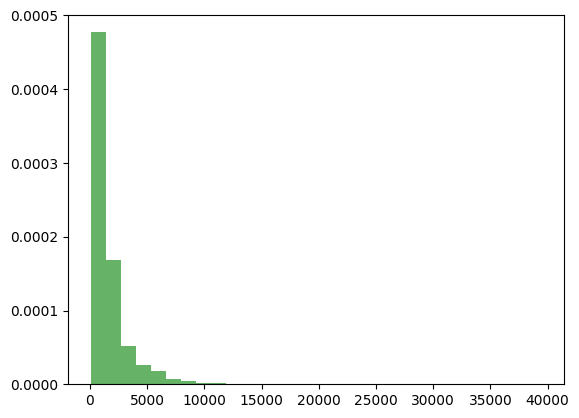

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm

# Simulated loss amounts that follow a log-normal distribution
np.random.seed(42)
shape = 0.954  # Shape parameter (sigma)
scale = 1000   # Scale parameter (mu)
size = 1000    # Sample size

# Generate log-normal distributed loss data
loss_data = lognorm.rvs(s=shape, scale=scale, size=size)

# Plotting the histogram of the simulated loss data
plt.hist(loss_data, bins=30, density=True, alpha=0.6, color='g')

# Plot the theoretical log-normal distribution curve
x = np.linspace(min(loss_data), max(loss_data), 100)
pdf = lognorm.pdf(x, sparams=shape, scale=scale)
plt.plot(x, pdf, 'r-', lw=2, label='Log-normal fit')
plt.title('Log-Normal Distribution Fit')
plt.xlabel('Loss Amount')
plt.ylabel('Density')
plt.legend()
plt.show()


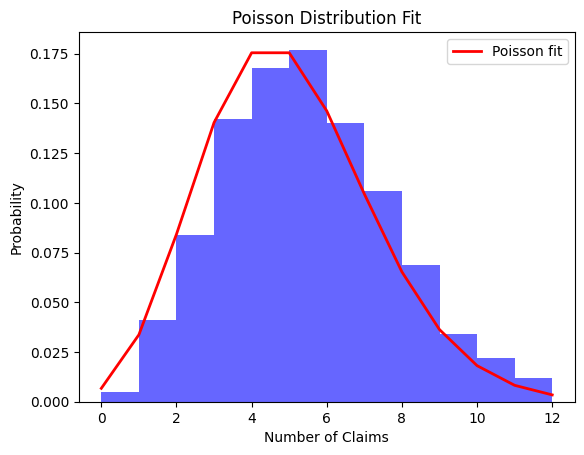

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Set the average number of claims per month (lambda)
lambda_claims = 5
size = 1000  # Sample size for simulation

# Simulate the number of claims using Poisson distribution
claims_data = poisson.rvs(mu=lambda_claims, size=size)

# Plotting the histogram of the simulated claims data
plt.hist(claims_data, bins=range(0, max(claims_data)+1), density=True, alpha=0.6, color='b')

# Plot the theoretical Poisson distribution curve
x = np.arange(0, max(claims_data)+1)
pmf = poisson.pmf(x, mu=lambda_claims)
plt.plot(x, pmf, 'r-', lw=2, label='Poisson fit')
plt.title('Poisson Distribution Fit')
plt.xlabel('Number of Claims')
plt.ylabel('Probability')
plt.legend()
plt.show()
